In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder

In [23]:
data_set = pd.read_csv("banana_quality.csv")
data_set

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [3]:
data_set.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [71]:
x_data = data_set.iloc[:,:-1] 
# Assingmg the features 'Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime','Ripeness', 'Acidity' to x_data
y_data = data_set.iloc[:,-1]
# Assinging the quality feature to y_data
x_train , x_test, y_train, y_test = train_test_split(x_data,y_data,test_size = 0.3,random_state = 5)
# Dividing the data into train and test 

C:\Users\gandl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


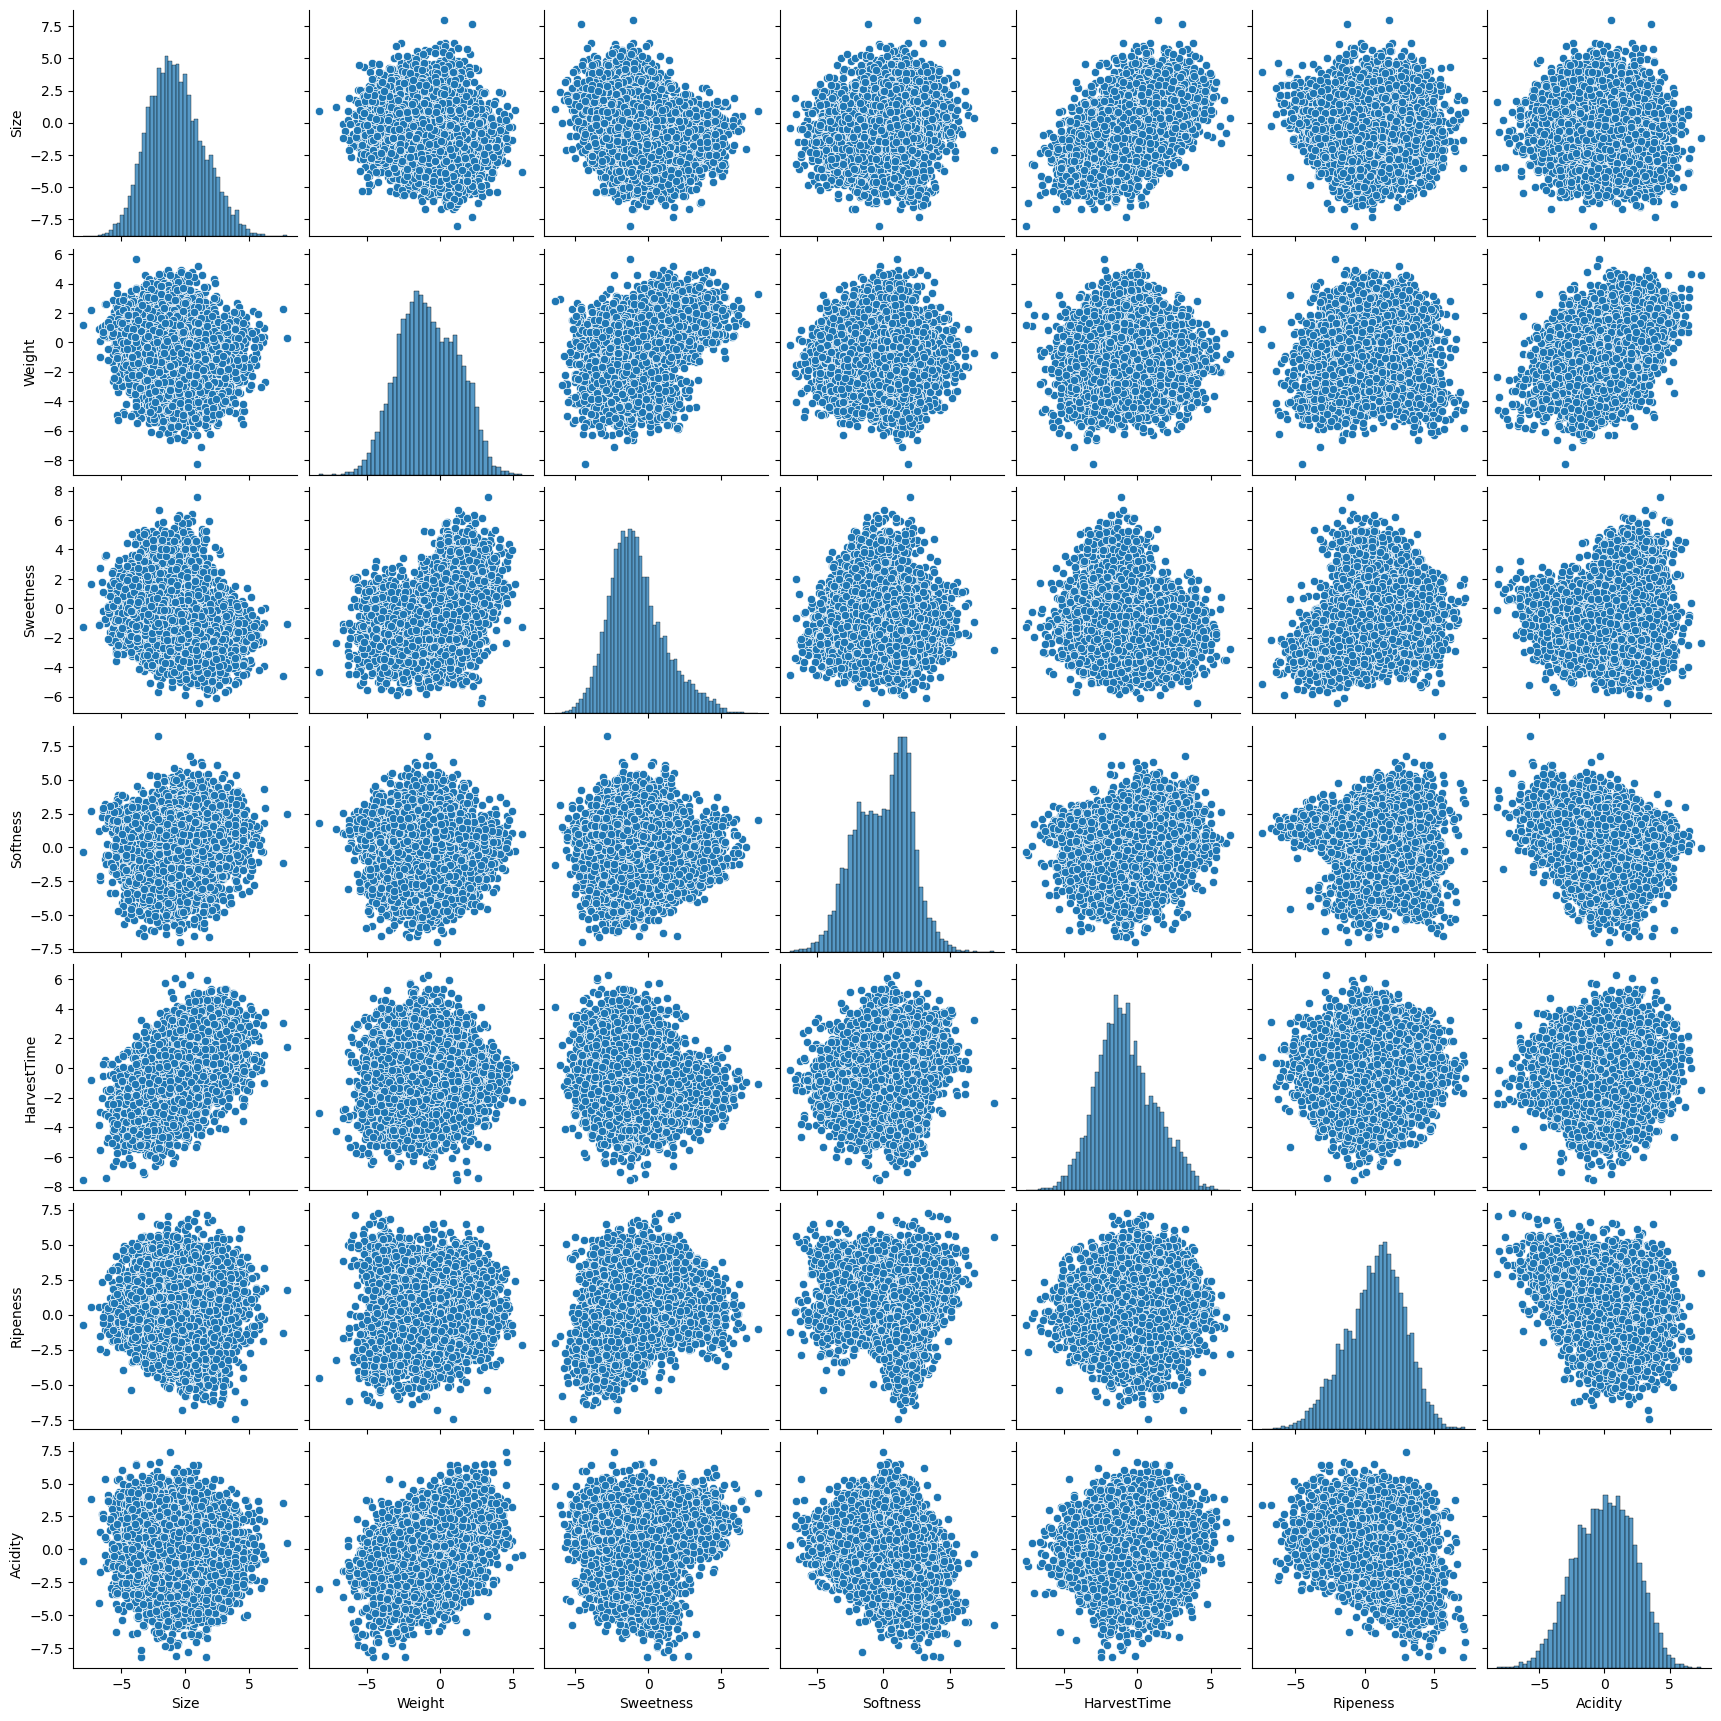

In [72]:
sns.pairplot(x_data)

<Axes: >

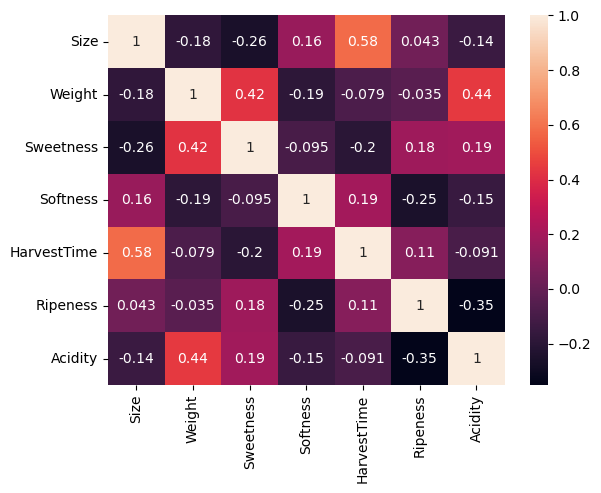

In [73]:
sns.heatmap(x_data.corr() , annot  = True)

In [70]:
perceptron = Perceptron(max_iter = 1500,early_stopping =  True , penalty = "elasticnet" ,l1_ratio = 0.5)
# Model generation
# Adding a penality of l1 , and maxinum iterations are set to 1500 ,and a penality of "elasticnet" is added
# l1_atio is only used when elastic_net is used becaouse the elasic net applies the penality of combination of l_1 and l_2 
#  l1_ratio specifies the ratio of l1 penality to be added

In [65]:
perceptron.fit(x_train,y_train)
pred = perceptron.predict(x_test)
pred

array(['Bad', 'Bad', 'Bad', ..., 'Bad', 'Bad', 'Bad'], dtype='<U4')

In [66]:
perceptron.score(x_test,y_test) # Gives the accurcay metrics score , accuracy = no.of correct pred / total no.of pred

0.8370833333333333

In [67]:
perceptron.classes_ # All the data is classified into 2 classes

array(['Bad', 'Good'], dtype='<U4')

In [68]:
perceptron.n_iter_ #Number of Iterations taken by the model 

6

In [69]:
perceptron.feature_names_in_ #Independent Features that have been concidered for prediccting the model 

array(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime',
       'Ripeness', 'Acidity'], dtype=object)